In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
data_set = pd.read_csv("cancer.csv")

In [15]:
# Check the column names in the dataset
print(data_set.columns)

# * just remove the column that is not needed and x will get the rest of the columns
x = data_set.drop(columns=["diagnosis(1=m, 0=b)"])


Index(['diagnosis(1=m, 0=b)', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [16]:
y = data_set["diagnosis(1=m, 0=b)"]

In [17]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
scaler.fit(x_train)

StandardScaler()

In [19]:

model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Dense(256, input_shape=(30,), activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
# * output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


g:\deep learning\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6801 - loss: 0.6275
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7790 - loss: 0.4733
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8991 - loss: 0.3265
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8540 - loss: 0.3436
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8968 - loss: 0.2836
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9179 - loss: 0.2342
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9068 - loss: 0.2567
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9121 - loss: 0.2472
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9007 - loss: 0.2313
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9280 - loss: 0.2056
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9204 - loss: 0.2128
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [23]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9403 - loss: 0.1586
Test Loss: 0.1709047257900238
Test Accuracy: 0.9210526347160339


In [24]:
from sklearn.metrics import  confusion_matrix,precision_score,recall_score,f1_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


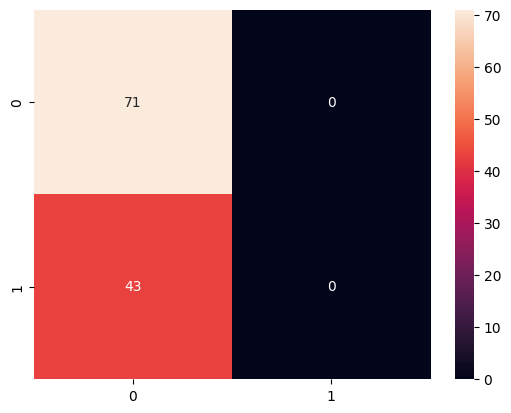

In [28]:
import numpy as np

cf = confusion_matrix(y_test, np.argmax(model.predict(x_test), axis=-1))
sns.heatmap(cf, annot=True)
plt.show()

In [80]:
new_data = [[17.99,	10.38,	122.8,	1001,	0.1184,	0.2776,	0.3001,	0.1471	,0.2419	,0.07871	,1.095,	0.9053	,8.589,	153.4	,0.006399,	0.04904,	0.05373,	0.01587	,0.03003,	0.006193,	25.38	,17.33,	184.6	,2019,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.1189]]

# # new_data = [[8.196,	16.84,	51.71,	201.9,	0.086,	0.05943,	0.01588,	0.005917,	0.1769,	0.06503,	0.1563,	0.9567,	1.094	,8.205,	0.008968,	0.01646	,0.01588	,0.005917,	0.02574,	0.002582,	8.964,	21.96,	57.26,	242.2,	0.1297,	0.1357,	0.0688,	0.02564,	0.3105	,0.07409]]
# new_data = [[12.34, 18.78, 68.45, 400.0, 0.107, 0.0703, 0.0314, 0.014,
#                      0.2500, 0.0700, 0.1900, 1.3000, 1.2000, 10.5000, 0.0142,
#                      0.0224, 0.0258, 0.0121, 0.0275, 0.0055, 9.8000,
#                      25.75, 65.40, 300.0, 0.1390, 0.1500, 0.0900, 0.0350,
#                      0.4000, 0.0850]]




In [81]:
new_data_scaled = scaler.transform(new_data)

g:\deep learning\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [82]:
prediction = model.predict(new_data_scaled)

predicted_probability = prediction[0][0]
print(f"Predicted Probability: {predicted_probability}")

# Convert to malignant or benign
if predicted_probability >= 0.5:
    print("Prediction: Malignant (Cancer)")
else:
    print("Prediction: Benign (Not Cancer)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Probability: 0.9998537302017212
Prediction: Malignant (Cancer)


In [78]:
# Malignant sample
malignant_sample = [[12.34, 18.78, 68.45, 400.0, 0.107, 0.0703, 0.0314, 0.014,
                     0.2500, 0.0700, 0.1900, 1.3000, 1.2000, 10.5000, 0.0142,
                     0.0224, 0.0258, 0.0121, 0.0275, 0.0055, 9.8000,
                     25.75, 65.40, 300.0, 0.1390, 0.1500, 0.0900, 0.0350,
                     0.4000, 0.0850]]

# Benign sample
benign_sample = [[7.65, 14.20, 45.10, 180.0, 0.078, 0.0540, 0.0120, 0.0045,
                  0.1400, 0.0600, 0.1300, 0.8400, 0.9000, 6.5000, 0.0075,
                  0.0150, 0.0120, 0.0040, 0.0200, 0.0020, 7.5000,
                  18.00, 48.00, 210.0, 0.1020, 0.1100, 0.0600, 0.0200,
                  0.2300, 0.0500]]

# Scale and predict
malignant_sample_scaled = scaler.transform(malignant_sample)
benign_sample_scaled = scaler.transform(benign_sample)

malignant_prediction = model.predict(malignant_sample_scaled)
benign_prediction = model.predict(benign_sample_scaled)

#* 1 indicates malignant (cancerous).
#* 0 indicates benign (non-cancerous).


# Output the predictions
print("Malignant Sample Prediction Probability:", malignant_prediction[0][0])
print("Malignant Sample Prediction:", "Malignant" if malignant_prediction[0][0] >= 0.5 else "Benign")

print("Benign Sample Prediction Probability:", benign_prediction[0][0])
print("Benign Sample Prediction:", "Malignant" if benign_prediction[0][0] >= 0.5 else "Benign")


g:\deep learning\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
g:\deep learning\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Malignant Sample Prediction Probability: 0.002006031
Malignant Sample Prediction: Benign
Benign Sample Prediction Probability: 0.0008473335
Benign Sample Prediction: Benign
